# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
bs=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
bs.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
bs.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Basic Data Exploration


In [5]:
bs.shape

(5110, 12)

In [6]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
bs.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [8]:
bs.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
bs.isnull().sum()*100/len(bs)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

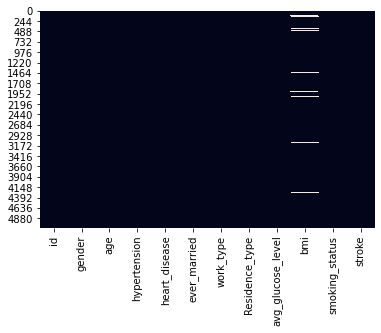

In [10]:
sns.heatmap(bs.isnull(),cbar=False)
plt.show

In [11]:
bs.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
bs.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


# Data Preprocessing

In [13]:
bs.dropna(axis=0,inplace=True)
bs.shape

(4909, 12)

In [14]:
bs["stroke"].replace({0:"No",1:"Yes"},inplace= True)

# Exploratory Data Analysis

Percentage of Patients With Brain Stroke

In [15]:
d1=bs.groupby('stroke').count()['age']
d1

stroke
No     4700
Yes     209
Name: age, dtype: int64

In [16]:
label1=bs.groupby("stroke").count()['age'].index
label1

Index(['No', 'Yes'], dtype='object', name='stroke')

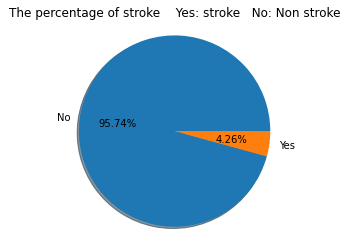

In [17]:
plt.axis("equal")
plt.pie(d1,labels=label1, shadow=True, autopct='%1.2f%%', radius=1.1)
plt.title("The percentage of stroke    Yes: stroke   No: Non stroke")
plt.show()

Stroke Patients Age Distribution

In [18]:
bs1=bs[bs["stroke"]=='Yes']
bs1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes


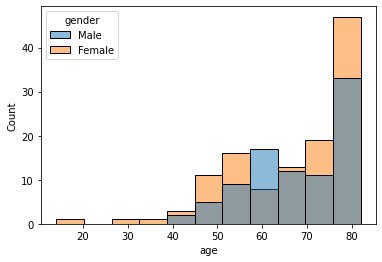

In [19]:
sns.histplot(data=bs1, x='age',hue='gender')
plt.show()

In [20]:
r1=bs1.groupby('gender').count()['id']
r1

gender
Female    120
Male       89
Name: id, dtype: int64

#Number of stroke patients- Male:120 , Female:89

Stroke Patients Age Distribution on Gender Basis

In [21]:
#Extracting data on basis of gender

M_data=bs1[bs1['gender']=='Male']
F_data=bs1[bs1['gender']=='Female']

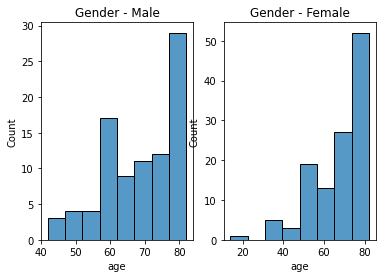

In [22]:
fig,((ax1, ax2))= plt.subplots(1,2)
ax1.title.set_text('Gender - Male')
sns.histplot(data=M_data, x="age", ax=ax1,)
sns.histplot(data=F_data, x="age", ax=ax2)
ax2.title.set_text('Gender - Female')

In [23]:
s_data=bs[bs["stroke"]=='Yes'] 
n_data=bs[bs["stroke"]=='No'] 

Hypertension

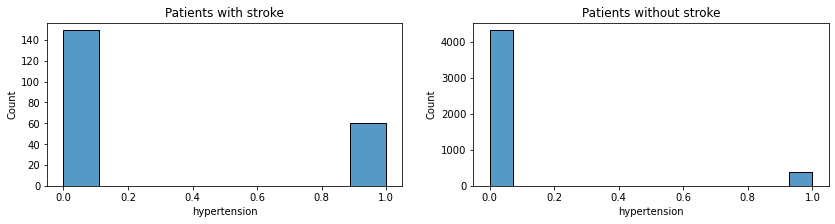

In [24]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="hypertension",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="hypertension",ax=ax2)
ax2.title.set_text('Patients without stroke')

#Most of the stroke patients does not have hypertension

#It is found that hypertension is found in majority of individuals in our dataset ,which is also another major medical condition we should address

Heart Disease

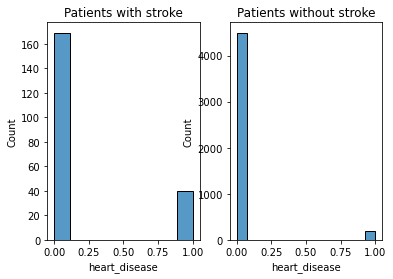

In [25]:
fig, ((ax1, ax2)) = plt.subplots(1,2)
sns.histplot(data=s_data,x="heart_disease",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="heart_disease",ax=ax2)
ax2.title.set_text('Patients without stroke')

#Most of the stroke patients does not have heart disease

Marital Status

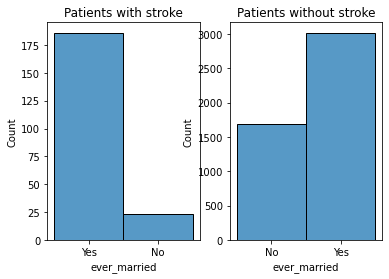

In [26]:
fig, ((ax1, ax2)) = plt.subplots(1,2)
sns.histplot(data=s_data,x="ever_married",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="ever_married",ax=ax2)
ax2.title.set_text('Patients without stroke')

Worktype

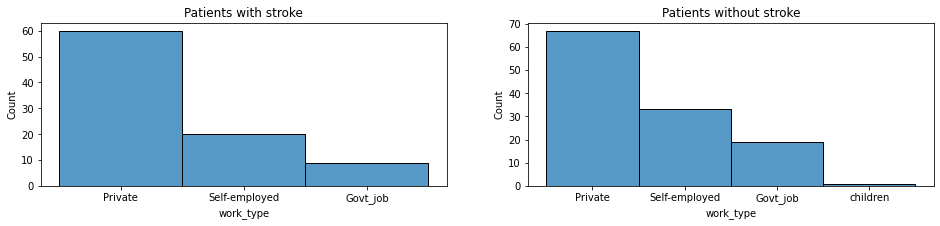

In [27]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=M_data,x="work_type",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=F_data,x="work_type",ax=ax2)
ax2.title.set_text('Patients without stroke')

#According to our data most of our stroke patients working in private & self-employed sectors

In [28]:
s_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes


Average glucose Level

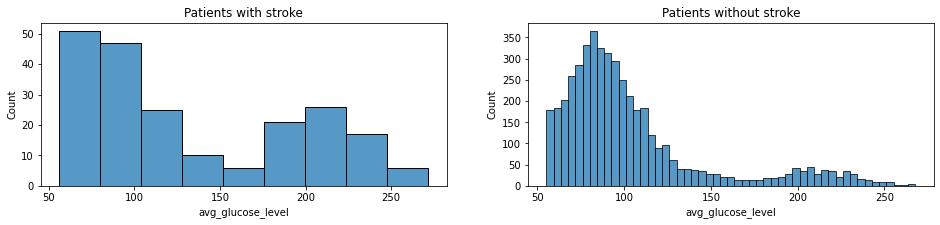

In [29]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="avg_glucose_level",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="avg_glucose_level",ax=ax2)
ax2.title.set_text('Patients without stroke')

#We can see most of the patient's average glucose levels fall in between 60 to 120     

#Also there are some high average glucose levels too

Body Mass Index

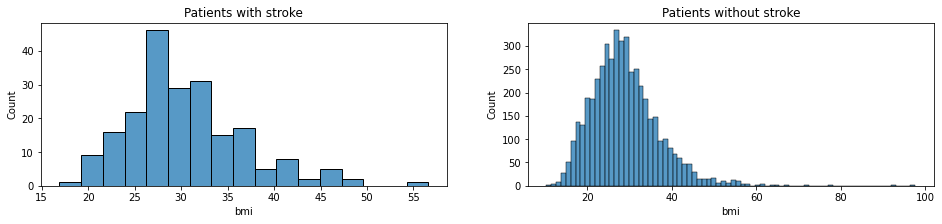

In [30]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="bmi",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="bmi",ax=ax2)
ax2.title.set_text('Patients without stroke')

#We can see the Most of the Stroke patient's BMI fall in between 25 to 35.    
#Also there are some high BMI values in patients without stroke

Smoking Status

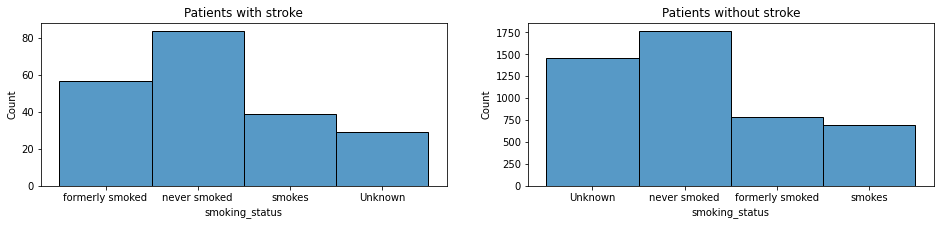

In [31]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="smoking_status",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="smoking_status",ax=ax2)
ax2.title.set_text('Patients without stroke')

#Most of the stroke patients have Never Smoked            
#Some of the stroke patients have Smoked Previuosly

# Prediction Model Building

In [32]:
bs.rename(columns={"id":"Id"},inplace=True)

In [33]:
f_data=bs.drop(['Id'],axis='columns')

In [34]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric)
lb=LabelEncoder()  

f_data['gender'] = lb.fit_transform(bs['gender'])
f_data['ever_married'] = lb.fit_transform(bs['ever_married'])
f_data['work_type'] = lb.fit_transform(bs['work_type'])
f_data['Residence_type'] = lb.fit_transform(bs['Residence_type'])
f_data['smoking_status'] = lb.fit_transform(bs['smoking_status'])
f_data['stroke'] = lb.fit_transform(bs['stroke'])
f_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [35]:
f_data.corr().style.background_gradient(cmap='GnBu')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


In [36]:
X=f_data.drop('stroke',axis='columns') #Extracting features
y=bs['stroke'] #target variable

In [37]:
from sklearn.model_selection import train_test_split #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Shape of training data", X_train.shape, y_train.shape)
print("Shape of testing data", X_test.shape, y_test.shape)

Shape of training data (3927, 10) (3927,)
Shape of testing data (982, 10) (982,)


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import confusion_matrix,  classification_report, accuracy_score

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr =  classification_report(y_test,y_pred)
ac =  accuracy_score(y_test,y_pred)

print(f"Accuracy_score:{ac}\n{cm}\n{cr}")

Accuracy_score:0.9592668024439919
[[940   2]
 [ 38   2]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       942
         Yes       0.50      0.05      0.09        40

    accuracy                           0.96       982
   macro avg       0.73      0.52      0.54       982
weighted avg       0.94      0.96      0.94       982



In [40]:
train = lr.score(X_train,y_train)
test = lr.score(X_test,y_test)
print(f"Testing accuracy:{test}\n Training accuracy:{train}")

Testing accuracy:0.9592668024439919
 Training accuracy:0.9572192513368984


# Support Vector Machine

In [41]:
from sklearn.svm import SVC

svm=SVC() 
svm.fit(X_train,y_train)

SVC()

In [42]:
from sklearn.metrics import confusion_matrix,  classification_report, accuracy_score

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr =  classification_report(y_test,y_pred)
ac =  accuracy_score(y_test,y_pred)

print(f"Accuracy_score:{ac}\n{cm}\n{cr}")

Accuracy_score:0.9592668024439919
[[942   0]
 [ 40   0]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       942
         Yes       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [43]:
train = svm.score(X_train,y_train)
test = svm.score(X_test,y_test)
print(f"Testing accuracy:{test}\n Taining accuracy:{train}")

Testing accuracy:0.9592668024439919
 Taining accuracy:0.9569646040234275


# RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import confusion_matrix,  classification_report, accuracy_score

y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr =  classification_report(y_test,y_pred)
ac =  accuracy_score(y_test,y_pred)

print(f"Accuracy_score:{ac}\n{cm}\n{cr}")

Accuracy_score:0.9572301425661914
[[940   2]
 [ 40   0]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       942
         Yes       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [46]:
train = rf_clf.score(X_train,y_train)
test = rf_clf.score(X_test,y_test)
print(f"Testing accuracy:{test}\n Taining accuracy:{train}")

Testing accuracy:0.9572301425661914
 Taining accuracy:1.0


# KNeighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
from sklearn.metrics import confusion_matrix,  classification_report, accuracy_score

y_pred =kn_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr =  classification_report(y_test,y_pred)
ac =  accuracy_score(y_test,y_pred)

print(f"Accuracy_score:{ac}\n{cm}\n{cr}")

Accuracy_score:0.9562118126272913
[[939   3]
 [ 40   0]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       942
         Yes       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [49]:
train = kn_clf.score(X_train,y_train)
test = kn_clf.score(X_test,y_test)
print(f"Testing accuracy:{test}\n Taining accuracy:{train}")

Testing accuracy:0.9562118126272913
 Taining accuracy:0.9572192513368984


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
from sklearn.metrics import confusion_matrix,  classification_report, accuracy_score

y_pred =dt_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr =  classification_report(y_test,y_pred)
ac =  accuracy_score(y_test,y_pred)

print(f"Accuracy_score:{ac}\n{cm}\n{cr}")

Accuracy_score:0.9307535641547862
[[905  37]
 [ 31   9]]
              precision    recall  f1-score   support

          No       0.97      0.96      0.96       942
         Yes       0.20      0.23      0.21        40

    accuracy                           0.93       982
   macro avg       0.58      0.59      0.59       982
weighted avg       0.94      0.93      0.93       982



In [52]:
train = dt_clf.score(X_train,y_train)
test = dt_clf.score(X_test,y_test)
print(f"Testing accuracy:{test}\n Taining accuracy:{train}")

Testing accuracy:0.9307535641547862
 Taining accuracy:1.0


In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


X, y = datasets.make_classification()
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.20,
                                                  random_state=2022)
print(X_train.shape, X_val.shape)

(80, 20) (20, 20)


In [54]:
bs = RandomForestClassifier()
bs.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             bs.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_val,
                             bs.predict(X_val))*100)

Training Accuracy :  100.0
Validation Accuracy :  95.0


In [55]:
bs = RandomForestClassifier(max_depth=2,
                               random_state=35)
bs.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             bs.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_val,
                             bs.predict(X_val))*100)

Training Accuracy :  95.0
Validation Accuracy :  95.0


In [56]:
bs = RandomForestClassifier(n_estimators=30,
                               random_state=22)
bs.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             bs.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_val,
                             bs.predict(X_val))*100)

Training Accuracy :  100.0
Validation Accuracy :  95.0


In [68]:
bs = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=3,
    random_state=22)
 
bs.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(
          y_train, bs.predict(X_train))*100)
 
print('Validation Accuracy : ', metrics.accuracy_score(
    y_val, bs.predict(X_val))*100)

Training Accuracy :  90.0
Validation Accuracy :  95.0


In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


X, y = datasets.make_classification()
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.20,
                                                  random_state=2022)
print(X_train.shape, X_val.shape)

(80, 20) (20, 20)


In [61]:
dl = DecisionTreeClassifier()
dl.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             dl.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_val,
                             dl.predict(X_val))*100)

Training Accuracy :  100.0
Validation Accuracy :  90.0


In [67]:
dl = DecisionTreeClassifier(
    max_depth=2,
    random_state=24)

dl.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             dl.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_val,
                             dl.predict(X_val))*100)

Training Accuracy :  92.5
Validation Accuracy :  85.0
